Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Importing modules

In [83]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df = pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
# To display all columns 
pd.set_option('display.max_columns', None)

In [4]:
# information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 32560 rows and 15columns

In [5]:
df.shape

(32560, 15)

In [6]:
# Drop any nan values if any
df.dropna(inplace = True)

In [7]:
# To check any null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

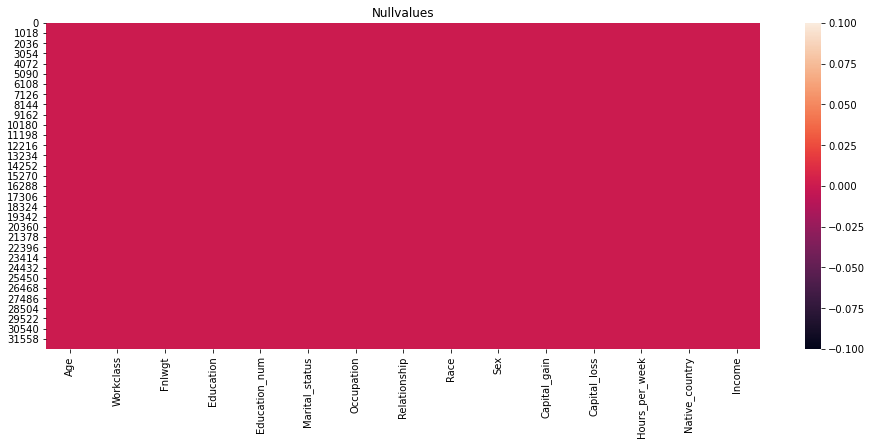

In [8]:
# showing the null values using heatmap
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Nullvalues")
plt.show()

There are no null values in the above dataset

In [9]:
#describing the descriptive statastics of numerical values
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1. The minimum age is 17 and maximum age is 90 
2. capitalgain,capital_loss,hoursperweek the values are not in order there might be outtliers present

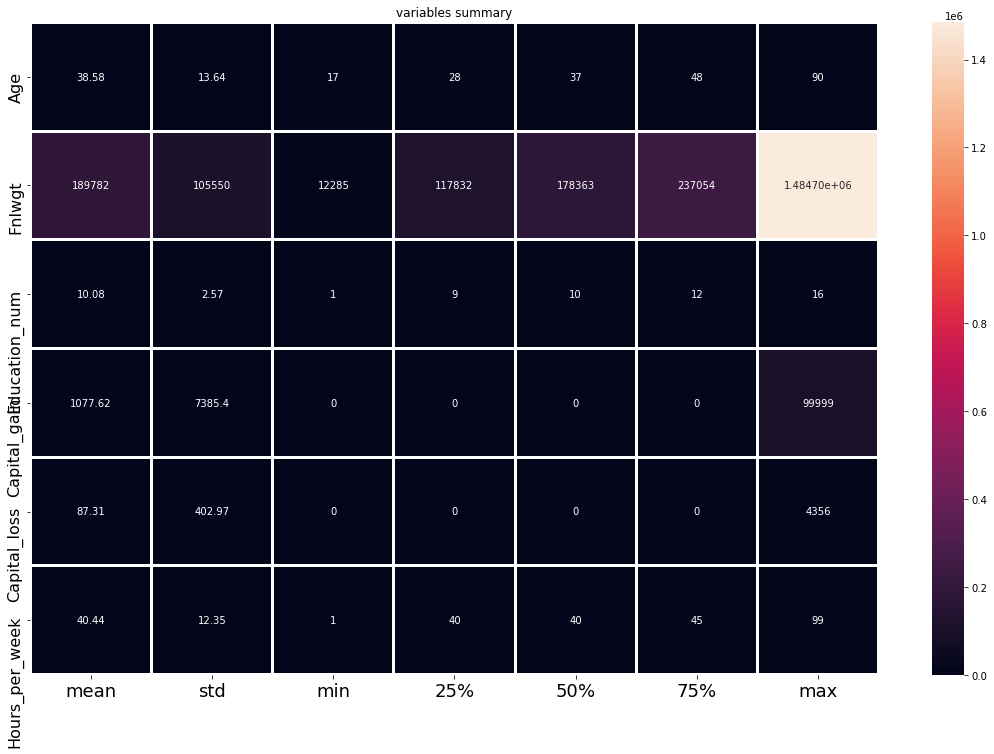

In [10]:
plt.figure(figsize = (19, 12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot = True,fmt="g")
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("variables summary")
plt.show()

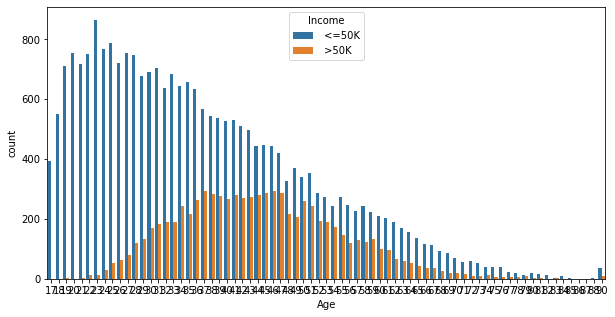

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='Income', data=df)
plt.show()


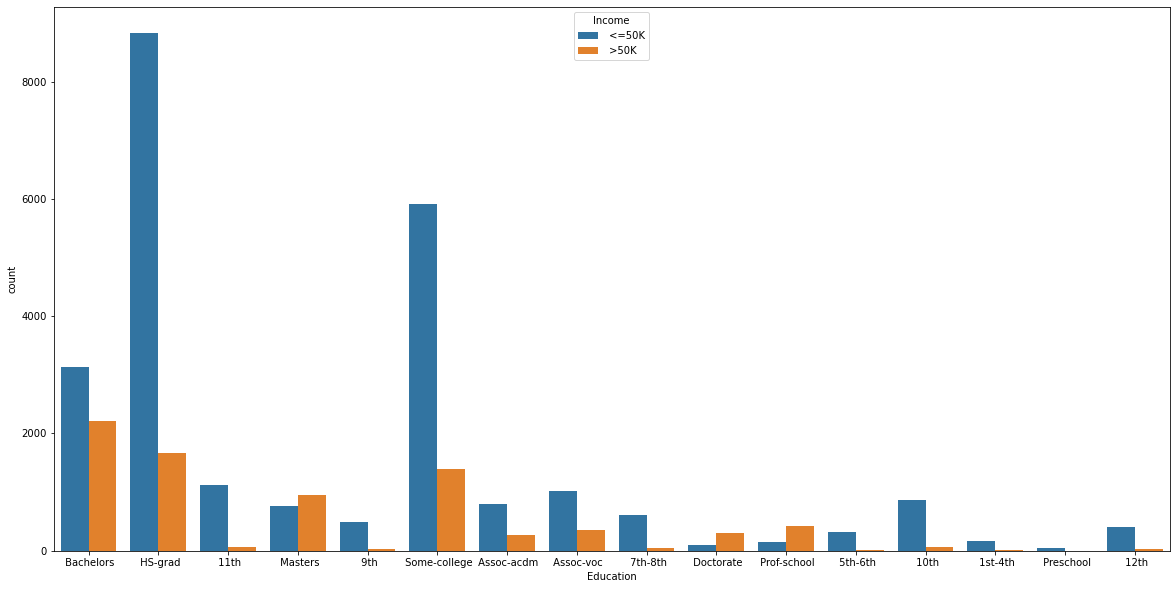

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='Education', hue='Income', data=df)
plt.show()

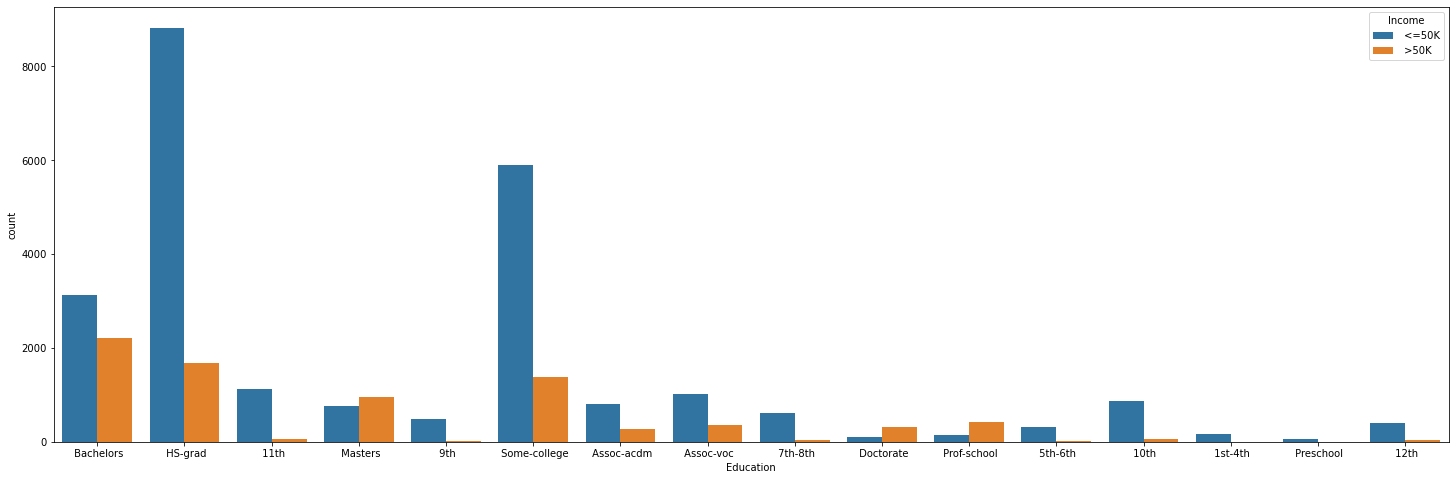

In [13]:
plt.figure(figsize=(25,8))
sns.countplot(x='Education', hue='Income', data=df)
plt.show()

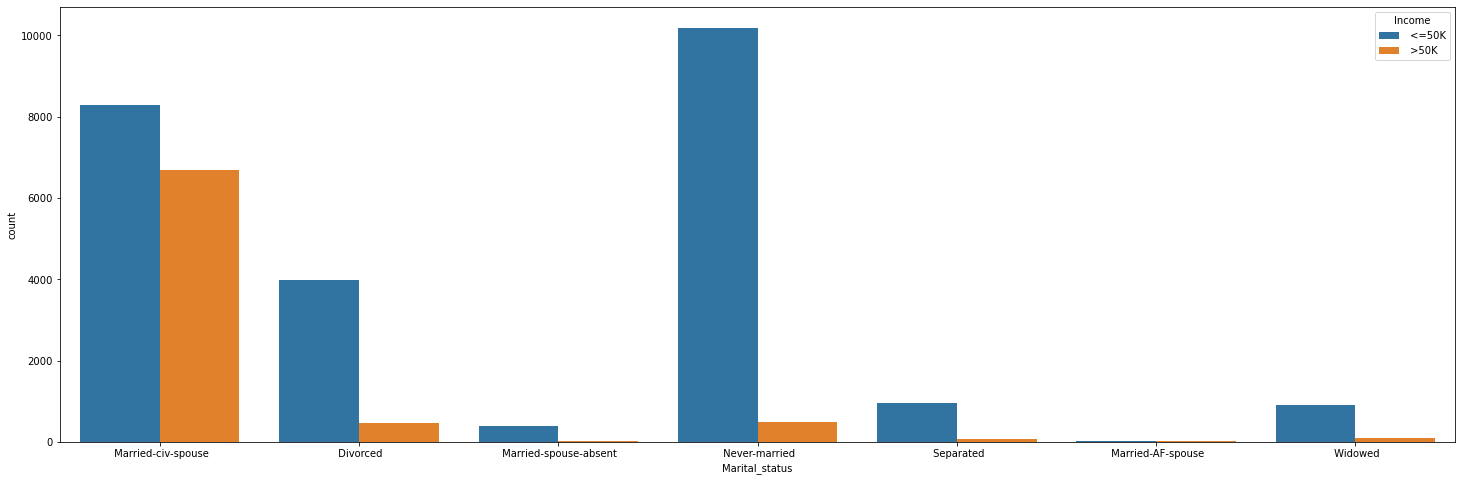

In [14]:
plt.figure(figsize=(25,8))
sns.countplot(x='Marital_status', hue='Income', data=df)
plt.show()

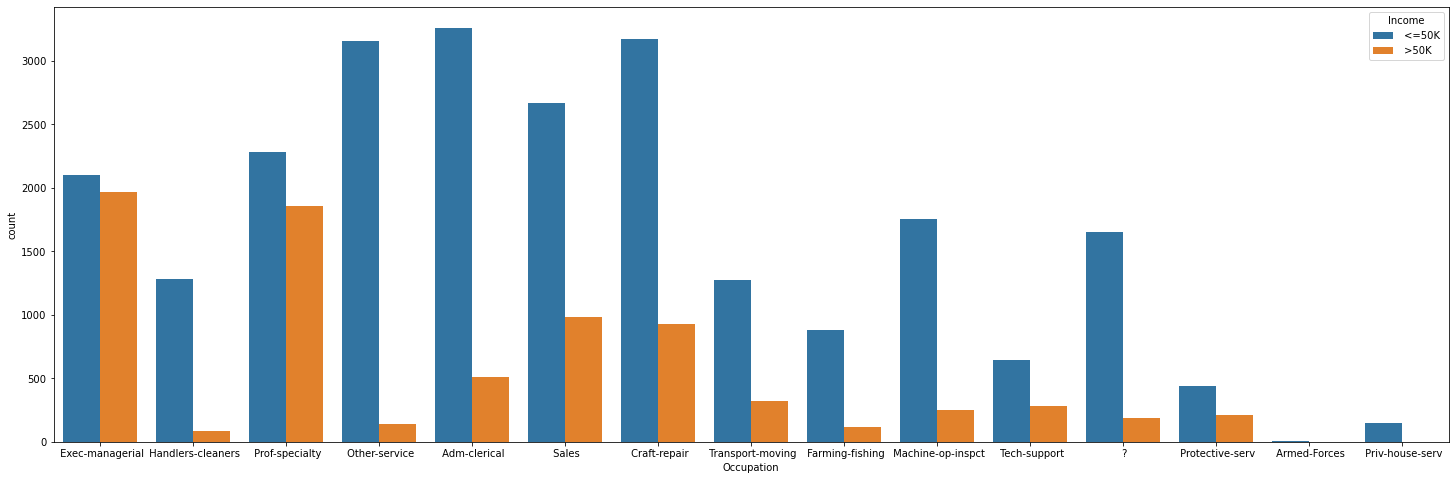

In [15]:
plt.figure(figsize=(25,8))
sns.countplot(x='Occupation', hue='Income', data=df)
plt.show()

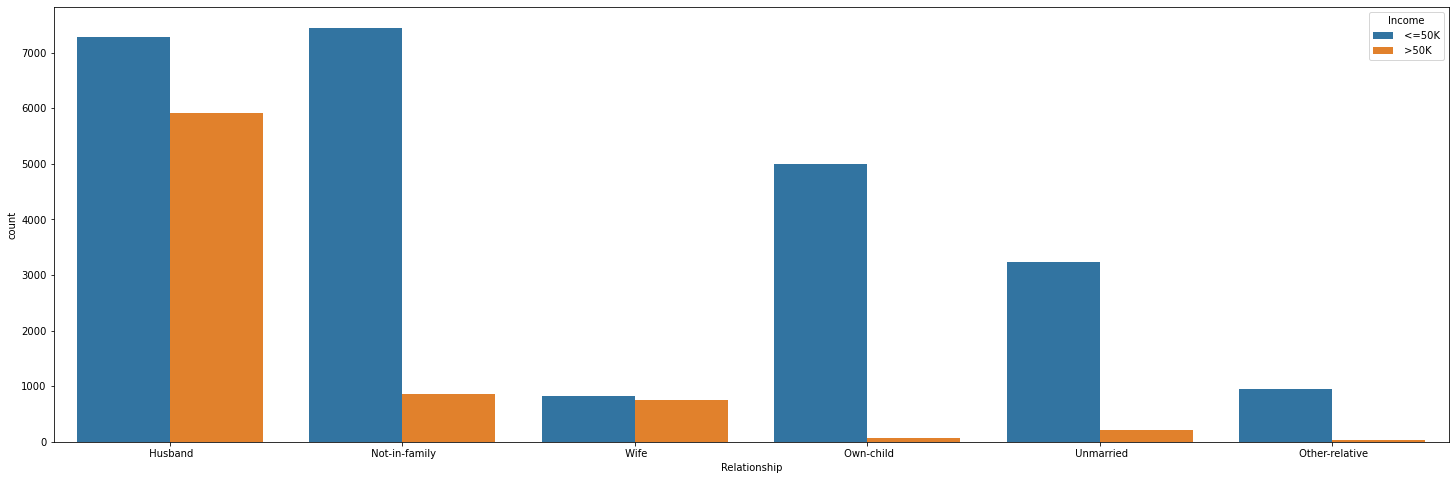

In [16]:
plt.figure(figsize=(25,8))
sns.countplot(x='Relationship', hue='Income', data=df)
plt.show()

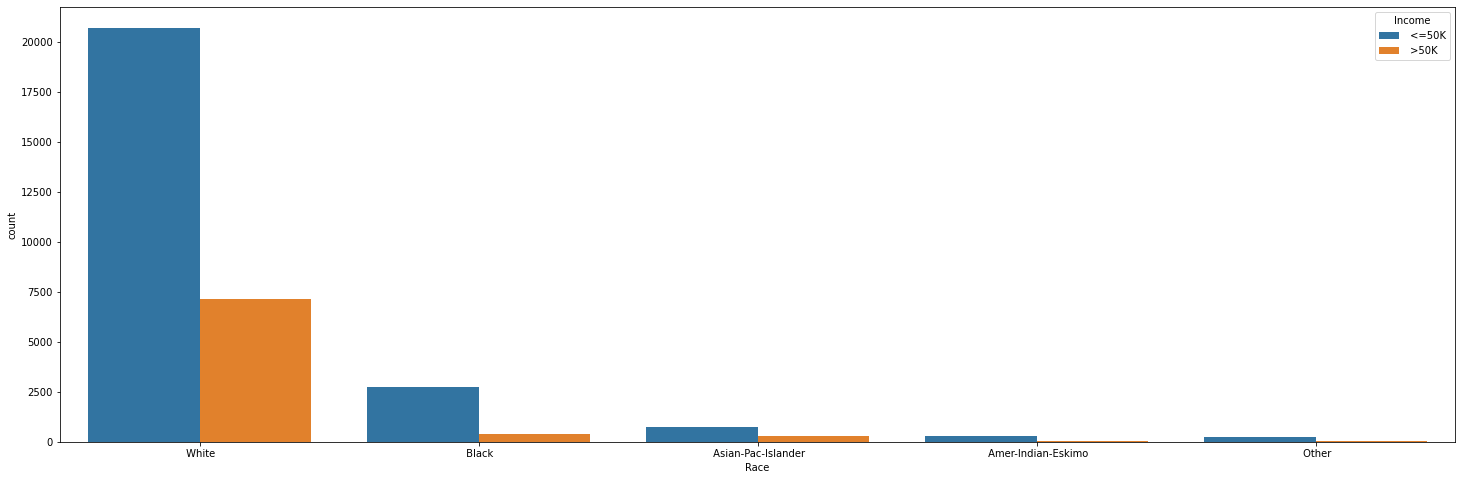

In [17]:
plt.figure(figsize=(25,8))
sns.countplot(x='Race', hue='Income', data=df)
plt.show()

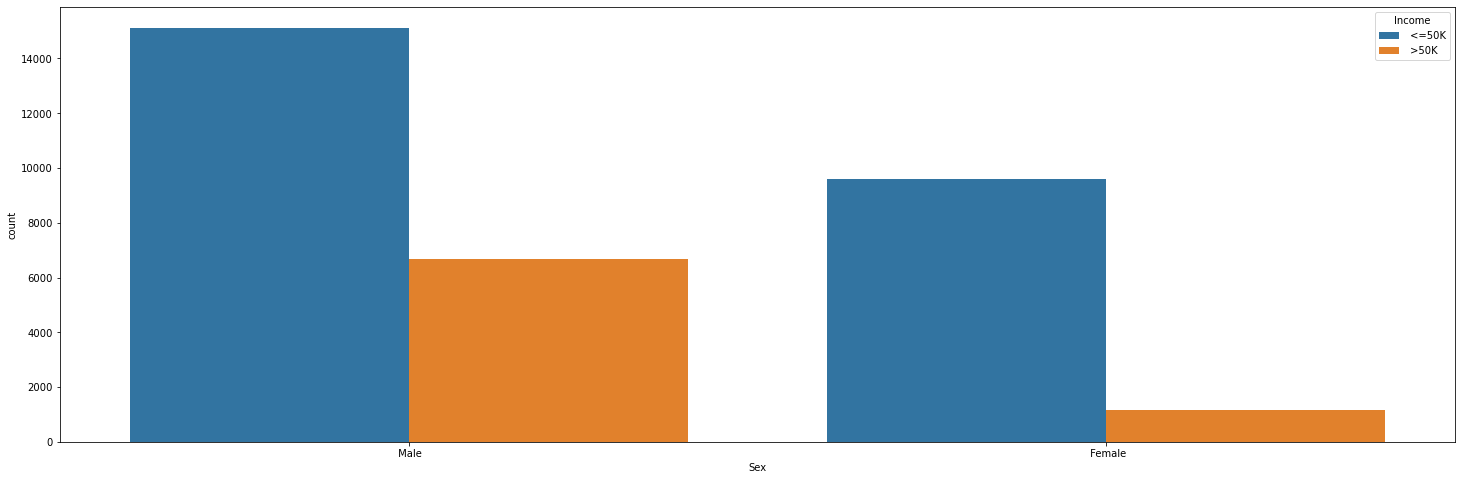

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(x='Sex', hue='Income', data=df)
plt.show()

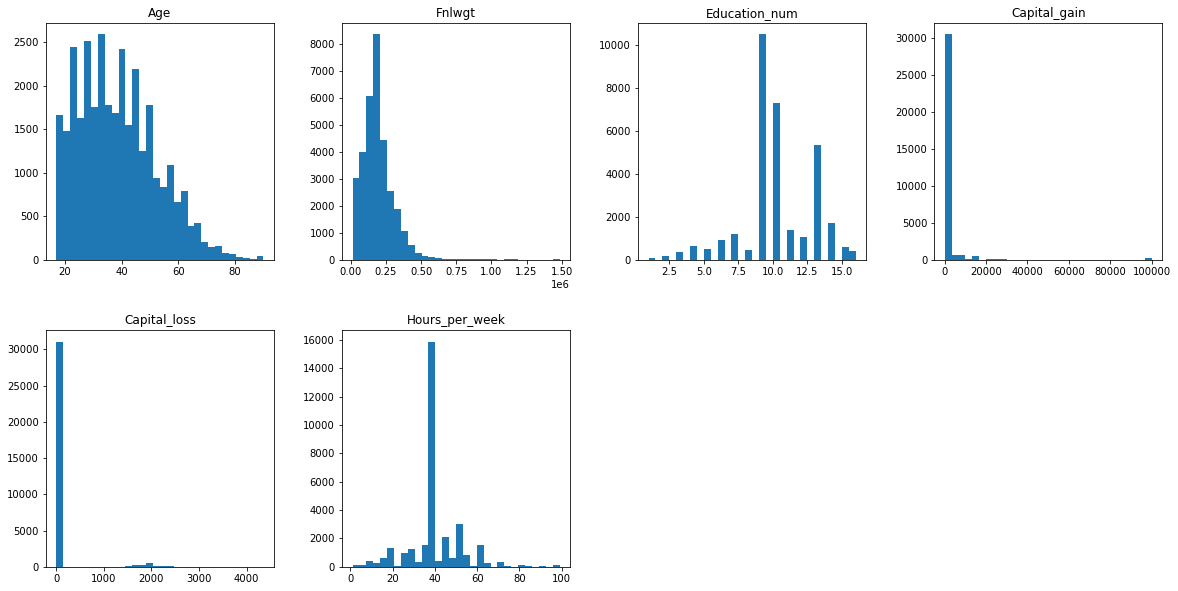

In [19]:
df.hist(figsize = (20, 10), grid = False, layout =(2, 4), bins = 30)
plt.show()

## converting categorical to numerical

In [20]:
df['Marital_status'] = df['Marital_status'].replace({'Married-civ-spouse':'Married', 'Divorced':'Single',
                                                     'Married-spouse-absent':'Single', 'Never-married':'Single',
                                                    'Separated':'Single', 'Married-AF-spouse':'Married',
                                                    'Widowed':'Single',})

In [21]:
df['Education'] = df['Education'].replace({'Bachelors':'Graduated', 'HS-grad':'Not_Graduated', '11th':'Not_Graduated',
                                          'Masters': 'Graduated', '9th': 'Not_Graduated', 'Some-college': 'Graduated',
                                          'Assoc-acdm': 'Graduated', 'Assoc-voc': 'Graduated', '7th-8th': 'Not_Graduated',
                                          'Doctorate': 'Graduated', 'Prof-school': 'Graduated', '5th-6th': 'Not_Graduated',
                                          '10th': 'Graduated', '1st-4th': 'Not_Graduated', 'Preschool': 'Not_Graduated',
                                          '12th': 'Not_Graduated',})

In [22]:
df["Workclass"] = df["Workclass"].replace({"Private": "Paid_Employed", "Self-emp-not-inc": "Paid_Employed",
                                           "Local-gov": "Paid_Employed", "?": "Paid_Employed",
                                           "State-gov": "Paid_Employed", "Self-emp-inc": "Paid_Employed",
                                           "Federal-gov": "Paid_Employed", "Without-pay": "Unpaid_Employed",
                                           "Never-worked": "UnEmployed",})

In [23]:
df['Native_country'] = np.where(df['Native_country'].str.contains("United-States"), "United-States", "Othercountry")

In [24]:
index_name = df[df['Occupation'] == '?'].index
df.drop(index_name, inplace=True)

In [25]:
indexName = df[df['Native_country'] == '?'].index
df.drop(indexName, inplace=True)

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Income'] = le.fit_transform(df['Income'])

In [27]:
df['Marital_status'] = le.fit_transform(df['Marital_status'])

In [28]:
# Now we will convert som categorical column with dummies variable
#dor columns 'Workclass', 'Education', 'Occupation', 'Relationship', 'Race', 'Native country'

df = pd.concat([df,pd.get_dummies(df['Workclass'],prefix='workclass')],axis=1).drop('Workclass',axis=1)
df = pd.concat([df,pd.get_dummies(df['Education'],prefix='Education')],axis=1).drop('Education',axis=1)
df = pd.concat([df,pd.get_dummies(df['Occupation'],prefix='Occupation')],axis=1).drop('Occupation',axis=1)
df = pd.concat([df,pd.get_dummies(df['Relationship'],prefix='Relationship')],axis=1).drop('Relationship',axis=1)
df = pd.concat([df,pd.get_dummies(df['Race'],prefix='Race')],axis=1).drop('Race',axis=1)
df = pd.concat([df,pd.get_dummies(df['Native_country'],prefix='Native-country')],axis=1).drop('Native_country',axis=1)

In [29]:
# In Capital_gain column 0 appears 28000 times and some various of values 
# In Capital_loss column 0 appears 29000 times and some various of values
# so to overcome from this problem we can apply standard scalar in these two columns

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Capital_gain'] = sc.fit_transform(df[['Capital_gain']].values).astype('int64')
df['Capital_loss'] = sc.fit_transform(df[['Capital_loss']].values).astype('int64')

In [30]:
df.head()

,Age,Fnlwgt,Education_num,Marital_status,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Occupation_ ?,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native-country_Othercountry,Native-country_United-States
0,50,83311,13,2,1,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,38,215646,9,0,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,53,234721,7,2,1,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,28,338409,13,2,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,37,284582,14,2,0,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


<AxesSubplot:xlabel='Income', ylabel='count'>

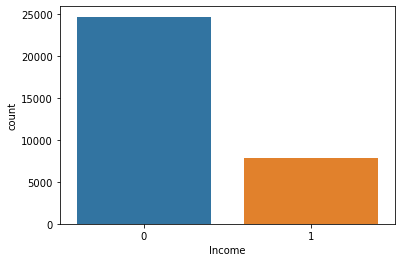

In [31]:
sns.countplot(df['Income'])

The income is not balanced

### Separating the features and labels

In [32]:
x = df.drop('Income', axis=1)
y= df['Income']

In [33]:
# Balancing the data 

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 24719, 1: 7841})
Resample dataset shape Counter({0: 24719, 1: 24719})


In [35]:
x

,Age,Fnlwgt,Education_num,Marital_status,Sex,Capital_gain,Capital_loss,Hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,Education_ 10th,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Occupation_ ?,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,Occupation_ Transport-moving,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Amer-Indian-Eskimo,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native-country_Othercountry,Native-country_United-States
0,50,83311,13,2,1,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,38,215646,9,0,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,53,234721,7,2,1,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,28,338409,13,2,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
4,37,284582,14,2,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12,2,0,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
32556,40,154374,9,2,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
32557,58,151910,9,6,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
32558,22,201490,9,4,1,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1


In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 32560, dtype: int32

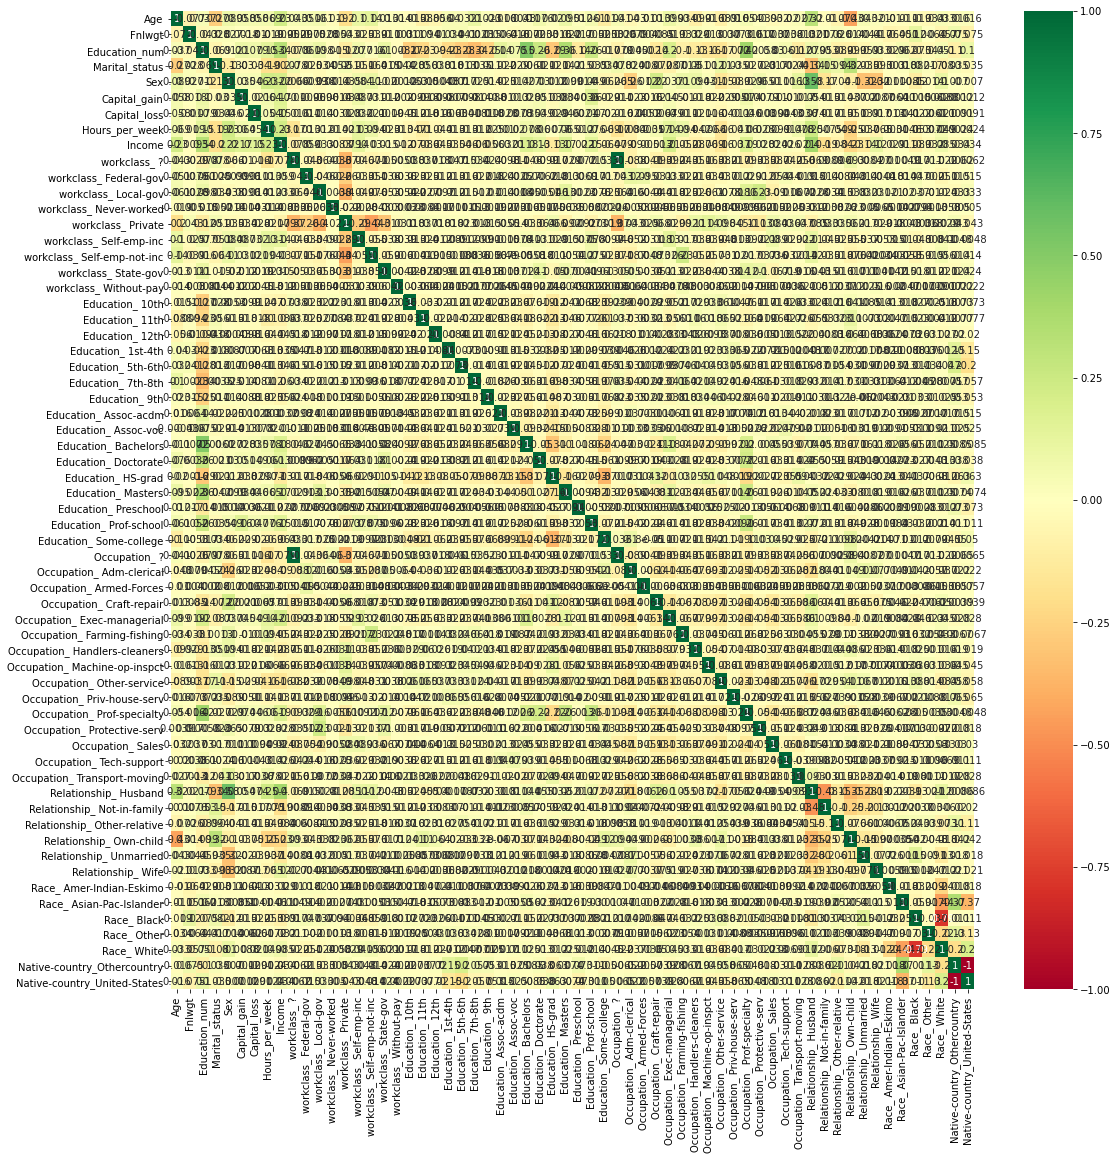

In [37]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [48]:
# checking the skewness of the data
df.skew()

Age                              0.558738
Fnlwgt                           1.446972
Education_num                   -0.311630
Marital_status                  -0.013448
Sex                             -0.719244
                                  ...    
Race_ Black                      2.743967
Race_ Other                     10.824361
Race_ White                     -2.008214
Native-country_Othercountry      2.592057
Native-country_United-States    -2.592057
Length: 62, dtype: float64

In [49]:
# importing power transform
from sklearn.preprocessing import power_transform
df_new = power_transform(x)
df_new = pd.DataFrame(df_new,columns=x.columns)

In [50]:
df_new.skew()

Age                             -0.013897
Fnlwgt                           0.016914
Education_num                    0.023885
Marital_status                  -0.114201
Sex                             -0.719244
                                  ...    
Race_ Black                      2.743967
Race_ Other                     10.824361
Race_ White                     -2.008214
Native-country_Othercountry      2.592057
Native-country_United-States    -2.592057
Length: 61, dtype: float64

In [51]:
#data scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.435642,Age
1,1.044622,Fnlwgt
2,inf,Education_num
3,1.270423,Marital_status
4,1.973256,Sex
...,...,...
56,inf,Race_ Black
57,inf,Race_ Other
58,inf,Race_ White
59,inf,Native-country_Othercountry


In [53]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x_scaled, y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)

[1.39139358e-01 1.64701242e-01 6.41405734e-02 9.46437993e-03
 4.04531230e-03 4.90515361e-02 2.06023959e-02 9.24611268e-02
 1.39048275e-03 6.64144465e-03 7.71230788e-03 0.00000000e+00
 1.28672963e-02 7.26778206e-03 1.08080171e-02 6.26197535e-03
 9.49631547e-05 1.01356877e-03 1.27418867e-03 9.23457909e-04
 2.47548085e-04 6.09260508e-04 7.08776153e-04 6.89555834e-04
 3.35383582e-03 3.80034815e-03 2.11359968e-02 2.90318694e-03
 9.16667427e-03 5.66089863e-03 5.24192538e-05 2.78252004e-03
 7.19626607e-03 1.32309529e-03 6.71984038e-03 7.00073706e-06
 8.33787487e-03 1.98267541e-02 3.82809192e-03 3.56637042e-03
 5.31505335e-03 4.75199778e-03 3.38206982e-05 1.86443180e-02
 3.66408847e-03 8.54138374e-03 5.46639310e-03 5.67753229e-03
 1.60849785e-01 3.26317434e-03 1.03026717e-03 1.75641746e-03
 2.46038870e-03 4.04095122e-02 1.69649728e-03 4.29475370e-03
 6.31475197e-03 1.44071759e-03 8.42824996e-03 7.03181371e-03
 7.15136060e-03]


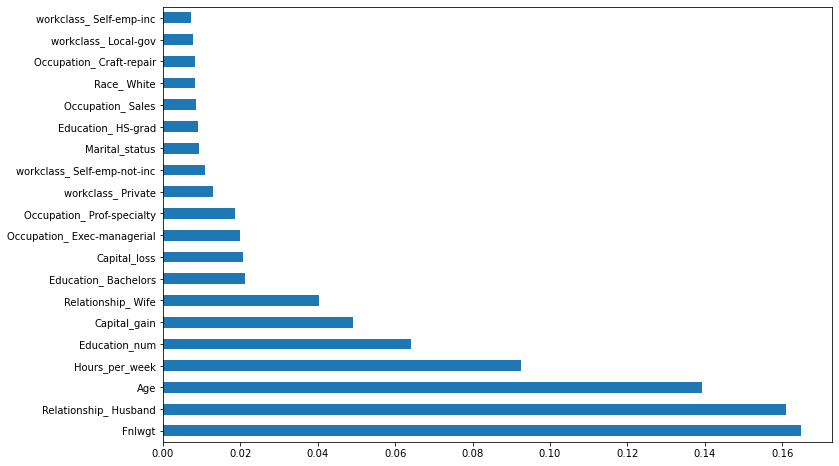

In [55]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [56]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,train_test_split

In [57]:
# checking for best random state

maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.7930738584125039 on Random State:  111


In [59]:
# creating train test split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=111)

## DecisionTreeClassifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,preddt)*100))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt,target_names=target_names,))

Accuracy Score: 85.60544768069039
[[6341 1140]
 [ 995 6356]]
              precision    recall  f1-score   support

     class 0       0.86      0.85      0.86      7481
     class 1       0.85      0.86      0.86      7351

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



## RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test,predrf)*100))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf,target_names=target_names))

Accuracy Score: 88.87540453074433
[[6725  756]
 [ 894 6457]]
              precision    recall  f1-score   support

     class 0       0.88      0.90      0.89      7481
     class 1       0.90      0.88      0.89      7351

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



## K nearest neighbors

In [62]:
# By using K nearest neighbors

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, predknn)*100))
target_names = ['class 0','class 1']
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn,target_names=target_names))

Accuracy Score: 66.80825242718447
[[4385 3096]
 [1827 5524]]
              precision    recall  f1-score   support

     class 0       0.71      0.59      0.64      7481
     class 1       0.64      0.75      0.69      7351

    accuracy                           0.67     14832
   macro avg       0.67      0.67      0.67     14832
weighted avg       0.67      0.67      0.67     14832



## Naive Bayes


In [63]:
# By using Naive Bayes

gnb = GaussianNB()
gnb.fit(x_train, y_train)
predgnb = gnb.predict(x_test)
target_names = ['class 0','class 1']
print("Accuracy Score: {}".format(accuracy_score(y_test, predgnb)*100))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb,target_names=target_names))

Accuracy Score: 73.9549622437972
[[4488 2993]
 [ 870 6481]]
              precision    recall  f1-score   support

     class 0       0.84      0.60      0.70      7481
     class 1       0.68      0.88      0.77      7351

    accuracy                           0.74     14832
   macro avg       0.76      0.74      0.73     14832
weighted avg       0.76      0.74      0.73     14832



## cross validation

In [64]:
# checking cross validation score

models = []
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))

maxx_acc = 0
for name, model in models:
    kfold = KFold(n_splits=10)
    cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    result = cv.mean()
    print('{}: {}'.format(name, result))
    if result > maxx_acc:
        maxx_acc = result
        b_model = name
print("The best model is {} with the accuracy {:.2f}".format(b_model, maxx_acc))

Naive Bayes: 0.743021237471879
Decision Tree: 0.8514998839254251
Random Forest: 0.8925615988562896
KNN: 0.6695948579798348
The best model is Random Forest with the accuracy 0.89


### Hyperparameter tuning using grid searchcv

In [72]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RandomForestClassifier(), hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 71.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 136.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 173.8min finished


In [73]:
bestF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 1200}

In [75]:
mod = RandomForestClassifier( max_depth=30, n_estimators=1200,min_samples_split=15,min_samples_leaf= 1)
mod.fit(x_train, y_train)
prediction = mod.predict(x_test)
print("Accuracy Score: {}".format(accuracy_score(y_test, prediction)))

Accuracy Score: 0.8948220064724919


### Checking how much our predictions are correct

In [76]:
predictions1 = pd.DataFrame({'predictions': prediction, 'Real Values': y_test})
predictions1

,predictions,Real Values
46462,1,1
16102,0,0
17323,0,0
47326,1,1
45963,1,1
...,...,...
12516,0,0
27932,0,0
22467,0,0
1416,1,1


## Plotting ROC AUC curve

In [77]:
# predicting probabilities
pred_prob1 = gnb.predict_proba(x_test)
pred_prob2 = dt.predict_proba(x_test)
pred_prob3 = knn.predict_proba(x_test)
pred_prob4 = rf.predict_proba(x_test)

In [78]:
from sklearn.metrics import roc_curve

# roc curve for model
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

# roc curve for tpr=fpr
random_prob = [0 for i in range(len(y_test))]
fpr, tpr, _ = roc_curve(y_test, random_prob, pos_label=1)

In [79]:
from sklearn.metrics import roc_auc_score

# auc score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8270740417055452 0.8561200640861715 0.7313348534466247 0.9605157897763074


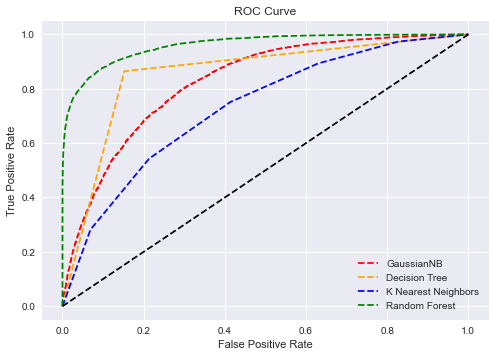

In [80]:
plt.style.use('seaborn')

# plot roc curve
plt.plot(fpr1, tpr1, linestyle='--', color='red', label='GaussianNB')
plt.plot(fpr2, tpr2, linestyle='--', color='orange', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--', color='blue', label='K Nearest Neighbors')
plt.plot(fpr4, tpr4, linestyle='--', color='green', label='Random Forest')
plt.plot(fpr, tpr, linestyle='--', color='black')

#title
plt.title('ROC Curve')

# x label
plt.xlabel('False Positive Rate')

# y label
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

## Saving the model

In [81]:
import joblib
joblib.dump(mod, 'Censusincome.pkl')

['Censusincome.pkl']

## Loading the saved model

In [82]:
model = joblib.load('Censusincome.pkl')
pred = model.predict(x_test)
print(accuracy_score(y_test, prediction))

0.8948220064724919
